In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

pd.options.display.max_columns = 99999 # just to be sure all columns name will be displayed

In [4]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses
 
     giniSum -= (len(actual) + 1) / 2.
     return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

In [24]:
dataset = pd.read_csv("data/train.csv")
dataset.replace(-1, np.nan, inplace=True)
dataset.drop('id', axis=1, inplace=True)

### Classes distribution in dataset

In [25]:
value_counts = dataset.target.value_counts(normalize=True)
ncount = len(dataset)

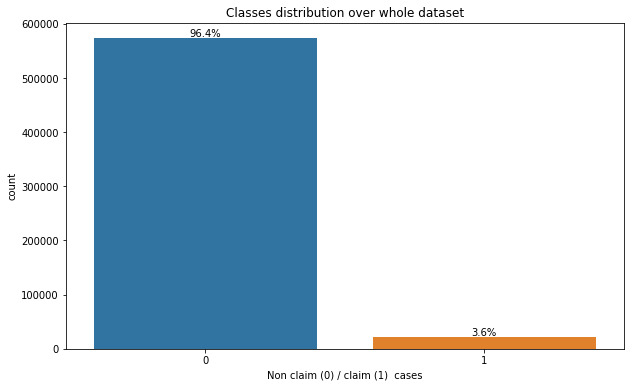

In [26]:
plt.title("Classes distribution over whole dataset")
ax = sb.countplot(x='target', data=dataset, )
plt.xlabel("Non claim (0) / claim (1)  cases")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.figure.set_size_inches(10,6)

In [89]:
feature_names = dataset.columns.values[1:]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


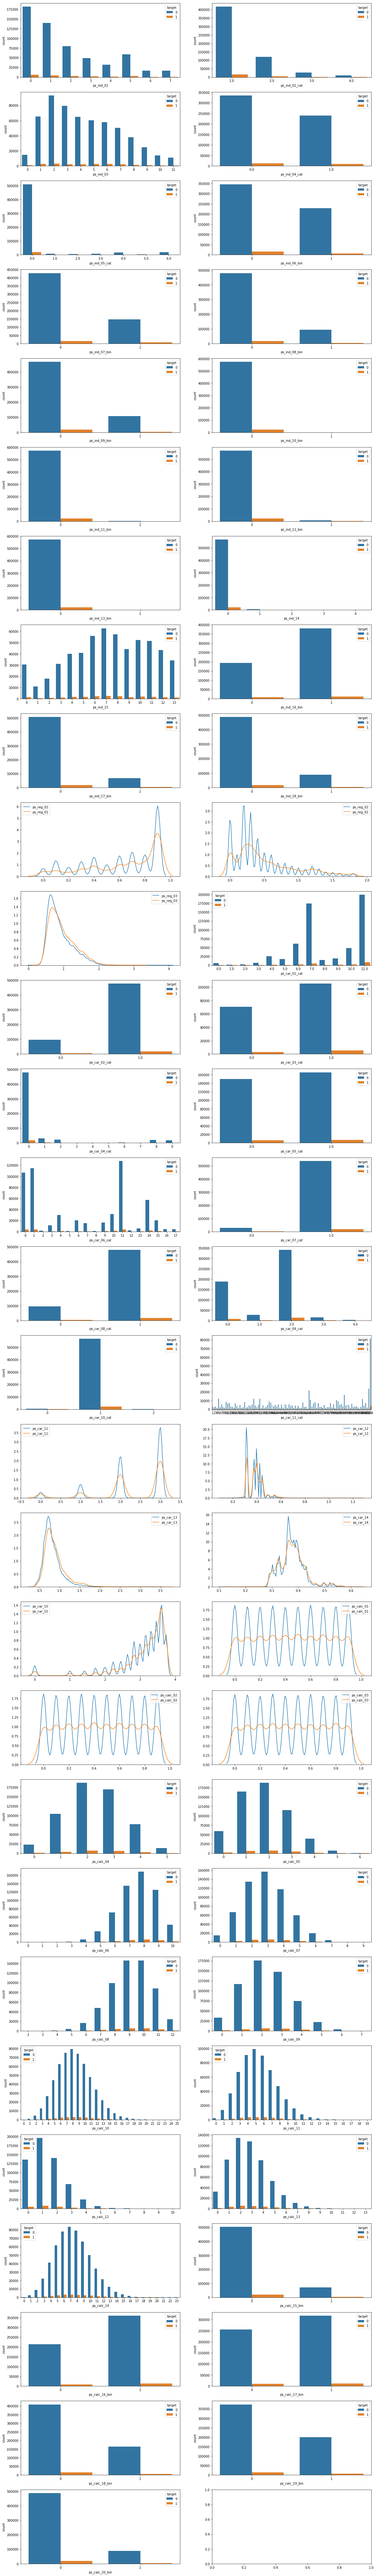

In [77]:
#plt.title("Classes distribution over whole dataset")
nrows = 29
ncols = 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,150)

#ax = sb.FacetGrid(dataset, hue="target")
for i in range(0,nrows):
    for j in range(0,ncols):
        f_idx = i*ncols + j + 1
        if f_idx == len(dataset.columns.values):
            break
        f = dataset.columns.values[f_idx]
        if not f.endswith(('_cat', '_bin')) and not (dataset[f].dtype == np.int64):
            ax = sb.kdeplot(data=dataset.loc[dataset.target == 0, f], ax=axs[i,j])
            ax = sb.kdeplot(data=dataset.loc[dataset.target == 1, f], ax=axs[i,j])
        else:
            ax = sb.countplot(hue='target', x=f,data=dataset, ax=axs[i,j])
#        for p in ax.patches:
#            x=p.get_bbox().get_points()[:,0]
#            y=p.get_bbox().get_points()[1,1]
#            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
#                ha='center', va='bottom') # set the alignment of the text

In [94]:
ind_features = [f for f in feature_names if '_ind_' in f]
reg_features = [f for f in feature_names if '_reg_' in f]
car_features = [f for f in feature_names if '_car_' in f]
calc_features = [f for f in feature_names if '_calc_' in f]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


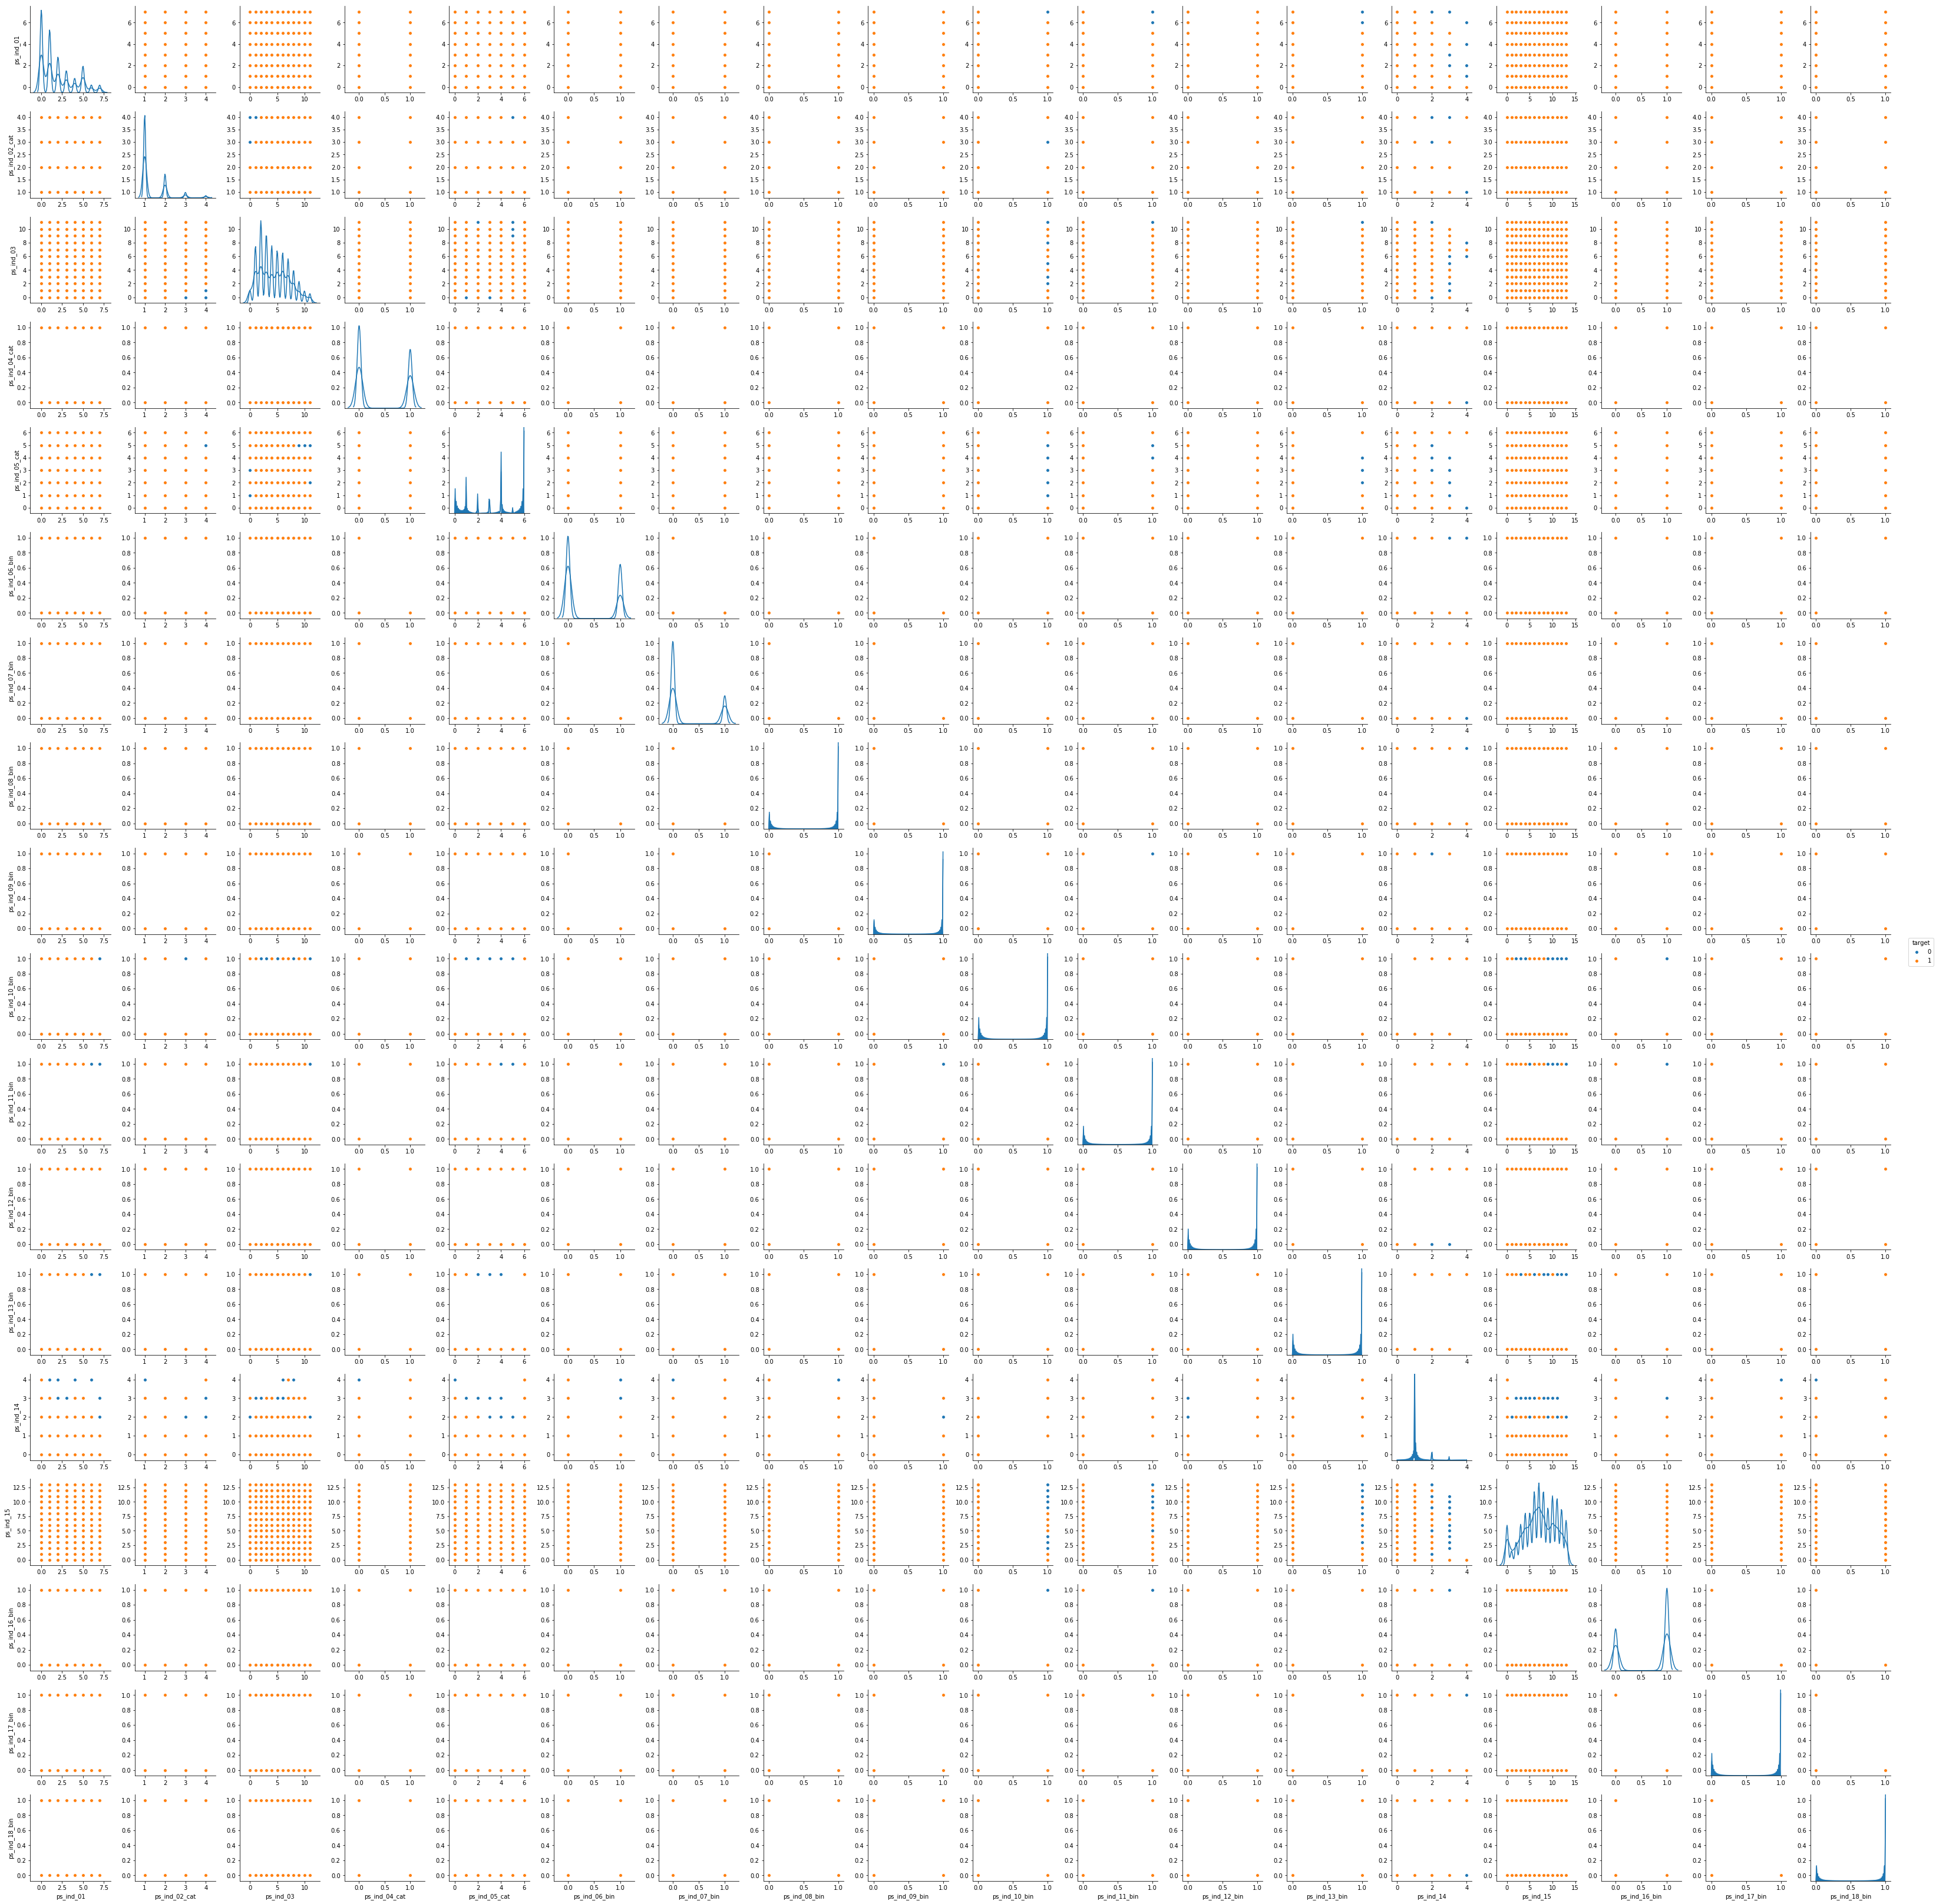

In [96]:
g = sb.pairplot(dataset, hue='target', vars=ind_features, diag_kind='kde')